In [8]:
from astropy.convolution import *
import sys
import os
sys.path.append(os.path.abspath('..'))
%matplotlib notebook
# utils=os.path.abspath('..')
from utils import *
import time
from KBs import *
(HTML(tog))

In [10]:
convolve_int=lambda a,fir,method:np.around(convolve(a,fir,method)).astype(np.int);
## Using B3/S23 as example

from os import environ
try:
    query = environ['query'];
    
    familyname, input_rulestr = query.split('_');
except:
#     familynam
    query='2dntca_000000000060031c61c67f86a0';
    print('fail to fetch query, using default rule, B3/S23 \n' +
    'example query'+query);

familyname, input_rulestr = query.split('_');
# if not 'input_rulestr' in locals():
#     input_rulestr='000000000060031c61c67f86a0';
# input_rulestr
CA_sys

fail to fetch query, using default rule, B3/S23 
example query2dntca_000000000060031c61c67f86a0


KBs.CA_sys

In [27]:

# @function
def measure_temperature(sys0=None,hdist=None,*args,**kwargs):
#     varargin = measure_temperature.varargin
#     nargin = measure_temperature.nargin
    sysX=copy.copy(sys0)
    jmax=sysX.N;
    
    if init_data == None:
        avi=sysX.rdf()
        siz=avi.shape
        siz=(sysX.hmax,)+siz;
        tmp=np.zeros(siz)
        smtmp=np.zeros(siz)
    else:
        avi = init_data['avi'];
        tmp = init_data['tmp'];
        smtmp = init_data['smtmp'];

    avc=avi
    i=0
    fir=np.reshape(2 ** (np.arange(0,9)),[1,3,3])
    trans=6
    mtp=0
    stp=0
    while i+1 < sysX.hmax:

        i=i + 1
        avcnew=(sysX.adv(avc,i))
        cavc=convolve_int(avc,fir,'wrap').astype(np.int);
        cavcnew=convolve_int(avcnew,fir,'wrap').astype(np.int);
        idx=np.ravel_multi_index((cavc,cavcnew),[2**9,2**9]);
        tmp[i,:,:,:]=np.expand_dims(hdist.flat[idx],0)
        if i >= trans:
            smtmpnow=np.mean(tmp[i - trans:i,:,:,:],axis=0)
            smtmp[i - trans,:,:,:]=smtmpnow
            if i >= trans + 10:
                mtp=np.mean(smtmpnow.flat)
                stpmat=((smtmp[i - trans,:,:,:] - smtmp[i - trans - trans,:,:,:]))
                a=np.mean(np.abs(stpmat.flat))
                b=abs(np.mean(stpmat.flat))
                stp=a - b
                stp1=np.mean(avcnew.flat)
                stp1=min(stp1,1 - stp1)
        avc=avcnew;
        #     im1=[avc(1,:,:)];
        if mtp < 0.02 and i > 20:
            break
    
    fam_alias=sys0.familyname+'_'+sys0.alias;
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:55
    # s=sprintf('%s\\t%s\\t%d\\t%f\\t%f\\t%f\\n',fam_alias,num2str(sys0.od),i,mtp,stp,stp1)
    s='{}\t{}\t{:d}\t{:f}\t{:f}\t{:f}\n'.format(fam_alias,sysX.rulestr,i,mtp,stp,stp1)
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:56
    return s
    
# if __name__ == '__main__':
#     pass
    

In [28]:
# #test
# ca1=CA_sys('2dntca',input_rulestr,[600,100,400]);
# ca1.rulestr2alias();
# s=measure_temperature(ca1,hdist);
# output_data=[];

ntca_list='''0c83820e0060061941946a68f0
1733981849c04af6ae996424e0
1125390c5add882663707cbf2f
2410f90c3c1ad303184fcf7bf5
022478c58a1fbb91f2022bf36f
3a96bf992f7527f42eb3dab5ef
184af6a375706e604132428008
009ef96711dfbee0513a90a090
06273cd54233f548a66e4bc060
305cb6ddda2c4e21184b802670
0781dacd5bd3d20501ce483466
3d4403a2e9f179119ab1d510b0
1cefed47ef30e2abc2fab59c8f
31445202992e8424e138e10428
2bfcf170f18f47108305a86a90
1ff2bc7cc13d268fd438c5d6f4
3515080e9f1f901ded2c222408
0822c9dff9148d209ab200cae0
2f52d5ea152c8c90c2268d8660
0715dde195e109487316f371df
37fa0df5c75f284a7216801b2b
2f6ad89296f7e1e79ee4eff181
3b9629635edae6b69e815a5e02
1384bbf3f0da584d09c2c88088
0045c6f8269fa82435cf56ecff
131a8d7c583c89551ccd48c1dc
3bfefd222c3875a02d732e6fd0
2c13b0a7d574623e8ffa9560e0
1cde2410a7da1cdd2db0b6a937'''
ntca_list=ntca_list.splitlines();

In [147]:
# generate random 
random_temp = 'rand_state'
def random_batch(random_temp,des_count = None):
    np.random.seed(0);
    try:
        f=open(random_temp,'a+');
        f.close()
    except:
        pass

    with open(random_temp,'rb') as f:
        try:
            count, state, = pickle.load(f);
            np.random.set_state(state);
        except:
            count = -1;
            print('no random state loaded, start from seed');
    if des_count == None:
        des_count = count + 1;
    elif des_count <= count:
        count = -1;
        np.random.seed(0);
    while count < des_count:
        count = count + 1; 
        a=np.random.random([2**18,102]) < 0.5;
        state = np.random.get_state();
        
    with open(random_temp,'wb') as f:
        pickle.dump([count,state,alst],f);
        print('state dumped to', '\'',random_temp,'\'')
    print(count)
    return a
a = random_batch(random_temp,0);
lst = ['']*a.shape[0];
# print(len(lst))
# alst=(list(hex(int(''.join(list(ains.astype(np.int).astype(np.str))),2)) for ains in a));
# print('done')
# alst[-1]

bin2hex=lambda ains, bit: hex(int(''.join(list(np.array(ains).astype(np.int).astype(np.str))),2))[2:].zfill(bit);

no random state loaded, start from seed
state dumped to ' rand_state '
0


In [151]:
# '0x3e87d9dfb4bcd9e00cafb23026'
# bin2hex([1,0,0,1,0,1,0,1],26)
a[0:3].shape

(3, 102)

In [163]:

def worker(piece):
    familyname, rulestr,init_data = piece;
#     global output
#     familyname, rulestr = fam_rulestr;
#     ca1.rulestr = rulestr;
    ca1=CA_sys(familyname, rulestr,[600,100,400]);
    ca1.rulestr2alias();
    s=measure_temperature(ca1,hdist,init_data = init_data);
#     with open(outfname,'a') as outf:
#         f.write(outfname);
#     print(s)
    return s;
#     print('{:d} of {:d}'.format(num,len(ntca_list)))
#     return s;
#     output+=[s];

# len(ipt)
# ntca_list.shape

no random state loaded, start from seed
state dumped to ' rand_state '
0


In [ ]:
import csv, multiprocessing, sys
# import multiprocessing  
count = 0;
a = random_batch(random_temp,0);
ipt = a;

# ipt=list(ntca_list*5)
# count = -1

In [173]:


outfname = 'result_count{:d}.csv'.format(count);
ca0=CA_sys('2dntca',input_rulestr,[600,100,400]);
ca0.rulestr2alias();

# print(ca0)
if __name__ == '__main__':
    process_num = 6;
    pool = multiprocessing.Pool(processes=process_num)   # default 1 proc per CPU
    chunk_size = process_num*2;
    siz_ipt = len(ipt);
    
    init_data={};    
    avi=ca0.rdf()
    siz=avi.shape
    siz=(ca0.hmax,)+siz;
    tmp=np.zeros(siz)
    smtmp=np.zeros(siz)
    init_data = {'avi':avi,
             'tmp':tmp,
             'smtmp':smtmp};
    
#     init_data=
#     chunk_ca=[ca0]*chunk_size;
    chunk_familyname = ['2dntca']*chunk_size
    chunk_rule = ipt[0:chunk_size];
    try:
        chunk_rule = list(bin2hex(ains,26) for ains in chunk_rule);
    except:
        pass
    chunk_init_data=[init_data]*chunk_size;
    chunk = np.vstack((chunk_familyname,chunk_rule,chunk_init_data)).T;
#     print(chunk[0].shape)
# chunk.shape
#     print(chunk_rule)
#     print(chunk[0][2])
    f=open('progress','a+');
    f.close();
        
    with open('progress','rb') as fpg:
        try:
            lastchk = pickle.load(fpg);
        except:
            lastchk = 0;
#     siz_ipt=121;
    for chunk_ind in range(lastchk,siz_ipt,chunk_size): 
        print(chunk_ind , ' of ',siz_ipt );
        
        chunk_rule = ipt[chunk_ind:chunk_ind+chunk_size];
        try:
            chunk_rule = list(bin2hex(ains,26) for ains in chunk_rule);
        except:
            pass
        chunk[:,1]=chunk_rule;
        init_data['avi']=ca0.rdf();
        chunk[:,2]=[init_data]*chunk_size;
#         print(chunk)
        outf=open(outfname,'a');
        
        for resultset in pool.imap(worker, chunk):
#             print(resultset)
            outf.write(resultset);
        print('wrote result to file')
        outf.close();
        
        with open('progress','wb') as fpg:
            pickle.dump(chunk_ind + 1,fpg)
        
    pool.close()
    pool.join()   
    print('done')
    

done


In [131]:
a = random_batch(random_temp);
lst = ['']*a.shape[0];
# print(len(lst))
alst=list(hex(int(''.join(list(ains.astype(np.int).astype(np.str))),2)) for ains in a);
alst[1]

'0x32890df70bbea185bb71756a90'

In [76]:
%matplotlib inline
np.random.seed(0);
a=np.random.random([2**18,102])<np.random.random();
st0 = np.random.get_state();
# a[-1,:]
# b=np.random.random([2**18,102])<np.random.random();
# fig, ax=plt.subplots()
# ax.imshow(b[0,:100].reshape([10,-1]))

('MT19937', array([4088100585, 2872392272, 3941035901, 3998436313, 3803132407,
         597691939,   37666738, 4150201347,   90986398, 1410987631,
        2447043766, 1669485450,  910979759, 1048395676,  302007194,
        4190235567, 3009493425, 1353222252, 3428755595, 2975239185,
         701242327, 3054477422, 1706429569,  473869117, 1784862736,
        2892609800, 1394821711, 2330231060,  273844593,  313014103,
         683204012,  266652897, 1466712588, 2128612986, 3494589483,
        4277877676, 1014681406, 1287535250,  191587482, 2731933157,
         858034897,  208321718, 1167398985, 3505675668,  683295310,
        3214427618,  146512448, 2325010379, 2106170681, 4135926561,
        1060880122, 1045600698, 3841700393,  625644025, 3578316571,
        2415038468, 3767761369, 1850722155, 2530698841,  957580208,
        3130171284,  212260521, 3114701920, 1564361161, 1855606031,
        1644307849, 3018302526, 3758545587,  328243140, 2307745842,
         355408557, 1061827284, 18360

In [ ]:
### Profiling loop
# output_data=[];
    
# repeat=2;
input_list=[input_rulestr];
ipt_list=input_list*repeat;
# for i in range(5):
l_ipt=len(input_list)
log = ['Log of the process:'];
logs='Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat);
log += [logs];
# print('Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat))

for num,rulestr in enumerate(ipt_list):
    ca1=CA_sys(familyname,rulestr,[400,100,400]);
    ca1.rulestr2alias();
    s=measure_temperature(ca1,hdist);
    output_data+=[s];
#     print('{:d} of {:d}'.format(num,len(ipt_list)))
    logs =('{:d} of {:d} '.format(num,len(ipt_list)));
    log += [logs];

# print('data is succesfully generated at {:d} replicates'.format(repeat))
logs=('data is succesfully generated at {:d} replicates'.format(repeat))
log  += [logs];

temp_data=[];
for line in output_data:
    temp_data+=[line.rstrip('\n').split('\t')];
sample_data=np.array(temp_data)

In [43]:
import csv
# data=[[]]*5;
def csv2dat(fname):
    dat=[];
    with open(fname, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='\t')
        for row in (spamreader):
            dat+=[row];

    return np.array(dat);
# with open(infname) as :
infname = 'result.csv'
sample_data= csv2dat(infname);
sample_data.shape
# sample_data[1,:]

array([ '2dntca_b3i2e3aj2i4ri3c4n5a3k4yt5cy6knei7e8s1c2e3njr4ri5i2n3q4nw5a3k4kytz6kn7c4c6i',
       '1733981849c04af6ae996424e0', '24', '0.016806', '0.002270',
       '0.004156'], 
      dtype='<U116')

In [6]:
# print('\n Detail of the input:')
logs='\n Detail of the input:';
log+=[logs];
for k,v in ca1.__dict__.items():
    if not callable(v):
#         print(k+str(v).ljust(-10))
#         print("{:5} {:<15} {:<10}".format('',k, str(v)))

        logs=("{:5} {:<15} {:<10}".format('',k, str(v)));
        log+=[logs];
    

In [7]:
# import numpy as np

# # TEST sample_data
# sample_data=np.array([['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.148772', '0.087523',
#         '0.089563'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.152794', '0.086693',
#         '0.091644'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.148733', '0.089657',
#         '0.089387'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.150105', '0.092000',
#         '0.090981'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.153150', '0.089772',
#         '0.090938']], 
#       dtype='<U46')


## Landscape of the observed dynamics
* Hover on the point to get the NTCA(non-totalistic cellular automata) rule-string. Click to display the rulestring as a copyable string.
* Click on the bottom-left widgets to Zoom-and-pan

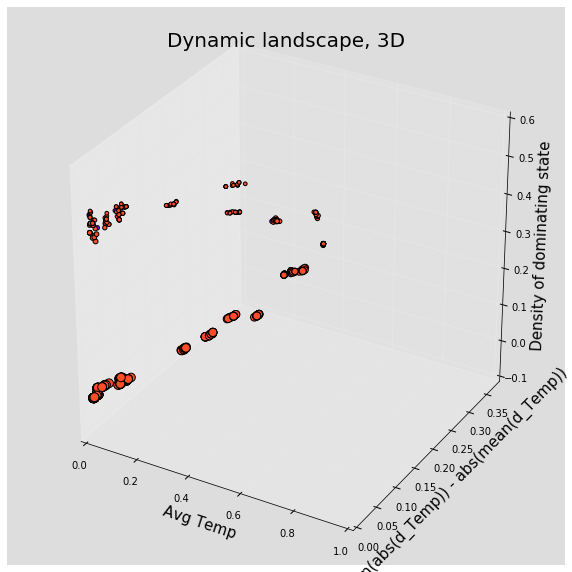

In [48]:
%matplotlib inline
# mpld3.enable_notebook()
from graphics import *
fig, ax = plt.subplots(subplot_kw=dict( axisbg = '#DDDDDD'
#                                         ,facecolor='#DDDDDD'
#                                        ,projection='3d'
                                      ))
fig.set_size_inches([10,10])

ax.grid(color='white', linestyle='solid')
ax.set_ylim(0,0.38)
ax.set_xlim(0,1)

fig2,ax2=plt.subplots(subplot_kw=dict(axisbg = '#DDDDDD',
#                                       facecolor='#DDDDDD',
                                       projection='3d'
                                      ))
fig2.set_size_inches([10,10])
# fig2.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.3)

ax2.grid(color='white', linestyle='solid')
ax2.set_ylim(0,0.38)
ax2.set_xlim(0,1)

fig,ax,fig2,ax2 = make_figure((fig,ax,fig2,ax2),sample_data)
fig.set_size_inches([10,10])
mpld3.display(fig)


In [9]:
# len(ntca_list)
# .shape
# print(tst_data)
print('\n'.join(log));

Log of the process:
Starting to profile 1 rules at 2 replicates,
 totaling 2 instances
0 of 2 
1 of 2 
data is succesfully generated at 2 replicates

 Detail of the input:
      rulestr         184af6a375706e604132428008
      familyname      2dntca    
      hmax            100       
      N               400       
      dimsiz          [400, 100, 400]
      alias           b2a3r4i5i3qk4ky5j4t6ac5k6n7c5e8s2a3ije4nw3yk4y5j4j5n4z5q6a5c6c5k6k7c5e7e
      siz             (400, 20, 20)


In [10]:
# from nbconvert import HTMLExporter
# import codecs
# import nbformat
# exporter = HTMLExporter()
# # execfile()
# output_notebook = nbformat.read('calc_temp.ipynb', as_version=4)
# output, resources = exporter.from_notebook_node(output_notebook)
# codecs.open('test.html', 'w', encoding='utf-8').write(output)